In [1]:
import pandas as pd

In [2]:
import os

In [3]:
import numpy as np

# Step 1: Data Cleaning and Exploration

In [4]:
Inpatient_Discharges_Data = pd.read_csv('Copy of Copy of Inpatient_Discharges_Data.csv')

Inpatient_Discharges_Data.head()

,Permanent Facility Id,Facility Name,Age Group,Gender,Race,Length of Stay,Type of Admission,Patient Disposition
0,541,North Shore University Hospital,50 to 69,M,Other Race,1,Emergency,Home or Self Care
1,541,North Shore University Hospital,50 to 69,M,Other Race,1,Urgent,Home or Self Care
2,541,North Shore University Hospital,18 to 29,F,White,4,Elective,Home or Self Care
3,541,North Shore University Hospital,30 to 49,F,White,5,Emergency,Home or Self Care
4,541,North Shore University Hospital,70 or Older,F,Black/African American,9,Emergency,Home or Self Care


In [5]:
# Drop column not used 
clean_data = Inpatient_Discharges_Data.drop(columns='Permanent Facility Id')

clean_data.head()

,Facility Name,Age Group,Gender,Race,Length of Stay,Type of Admission,Patient Disposition
0,North Shore University Hospital,50 to 69,M,Other Race,1,Emergency,Home or Self Care
1,North Shore University Hospital,50 to 69,M,Other Race,1,Urgent,Home or Self Care
2,North Shore University Hospital,18 to 29,F,White,4,Elective,Home or Self Care
3,North Shore University Hospital,30 to 49,F,White,5,Emergency,Home or Self Care
4,North Shore University Hospital,70 or Older,F,Black/African American,9,Emergency,Home or Self Care


In [6]:
# Remove "u" from the gender column
clean_data["Gender"] = clean_data["Gender"].str.replace("U", "")

clean_data.to_csv('clean_data.csv')

clean_data.head(10)


,Facility Name,Age Group,Gender,Race,Length of Stay,Type of Admission,Patient Disposition
0,North Shore University Hospital,50 to 69,M,Other Race,1,Emergency,Home or Self Care
1,North Shore University Hospital,50 to 69,M,Other Race,1,Urgent,Home or Self Care
2,North Shore University Hospital,18 to 29,F,White,4,Elective,Home or Self Care
3,North Shore University Hospital,30 to 49,F,White,5,Emergency,Home or Self Care
4,North Shore University Hospital,70 or Older,F,Black/African American,9,Emergency,Home or Self Care
5,North Shore University Hospital,50 to 69,M,Other Race,4,Emergency,Home w/ Home Health Services
6,North Shore University Hospital,70 or Older,F,Black/African American,2,Emergency,Home or Self Care
7,North Shore University Hospital,18 to 29,F,White,3,Elective,Home or Self Care
8,North Shore University Hospital,50 to 69,F,White,4,Emergency,Home or Self Care
9,Nassau University Medical Center,50 to 69,F,Black/African American,3,Elective,Home or Self Care


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
# Check for missing values
missing_values = clean_data["Length of Stay"].isnull().sum()
print("Number of missing values in 'Length of Stay':", missing_values)

Number of missing values in 'Length of Stay': 0


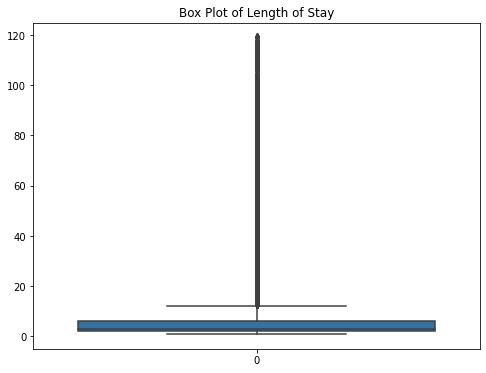

In [8]:
# Check for outliers using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(clean_data["Length of Stay"])
plt.title("Box Plot of Length of Stay")
plt.show()

In [9]:
# Calculate basic statistics
mean_length_of_stay = clean_data["Length of Stay"].mean()
median_length_of_stay = clean_data["Length of Stay"].median()
std_dev_length_of_stay = clean_data["Length of Stay"].std()

print("Mean Length of Stay:", mean_length_of_stay)
print("Median Length of Stay:", median_length_of_stay)
print("Standard Deviation of Length of Stay:", std_dev_length_of_stay)

Mean Length of Stay: 5.089175342826045
Median Length of Stay: 3.0
Standard Deviation of Length of Stay: 6.578723912207012


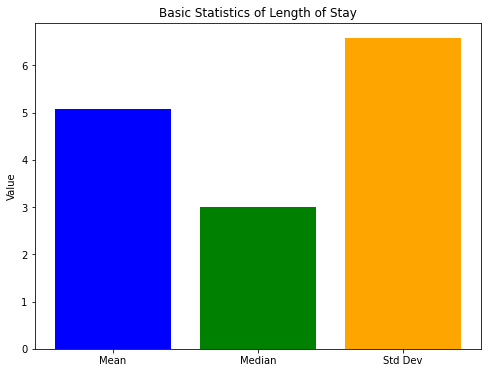

In [10]:
# Basic statistics
statistics = {
    "Mean": mean_length_of_stay,
    "Median": median_length_of_stay,
    "Std Dev": std_dev_length_of_stay
}

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(statistics.keys(), statistics.values(), color=['blue', 'green', 'orange'])
plt.title("Basic Statistics of Length of Stay")
plt.ylabel("Value")
plt.savefig(f"segment_visualisations/length_of_stay.png")
plt.show()

In [11]:
pip install tabulate



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
from tabulate import tabulate

# Basic statistics
statistics = [
    ["Mean", mean_length_of_stay],
    ["Median", median_length_of_stay],
    ["Std Dev", std_dev_length_of_stay]
]

# Display statistics in table format
table = tabulate(statistics, headers=["Statistic", "Value"], tablefmt="grid")
print(table)


+-------------+---------+
| Statistic   |   Value |
+=============+=========+
| Mean        | 5.08918 |
+-------------+---------+
| Median      | 3       |
+-------------+---------+
| Std Dev     | 6.57872 |
+-------------+---------+


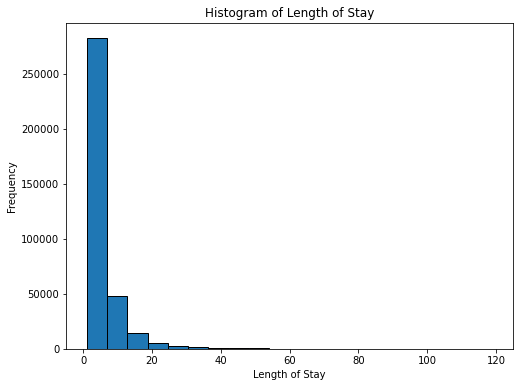

In [13]:
# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(clean_data["Length of Stay"], bins=20, edgecolor='k')
plt.title("Histogram of Length of Stay")
plt.xlabel("Length of Stay")
plt.ylabel("Frequency")
plt.show()

#The histogram provides a visual representation of how the values are distributed across different ranges. 
#The box plot gives you insights into the central tendency, spread, and presence of potential outliers in the distribution.

# Step 2: Segmentation and Grouping

In [14]:
# Segment the data based on different attributes. This will calculate the average length of stay for each combination of these categories.
segments = ["Age Group", "Gender", "Race", "Type of Admission", "Patient Disposition"]

for segment in segments:
    grouped_data = clean_data.groupby(segment)["Length of Stay"]
    
    # Calculate average length of stay for each segment
    avg_length_of_stay = grouped_data.mean()
    
    print(f"\nSegment: {segment}")
    print(avg_length_of_stay)


Segment: Age Group
Age Group
0 to 17        3.761487
18 to 29       4.154007
30 to 49       4.271870
50 to 69       5.411572
70 or Older    5.778379
Name: Length of Stay, dtype: float64

Segment: Gender
Gender
F    4.815322
M    5.418889
Name: Length of Stay, dtype: float64

Segment: Race
Race
Black/African American    5.527399
Multi-racial              6.226316
Other Race                4.631574
White                     5.114202
Name: Length of Stay, dtype: float64

Segment: Type of Admission
Type of Admission
Elective         4.199544
Emergency        5.434019
Newborn          3.683905
Not Available    4.728477
Trauma           5.874419
Urgent           5.304983
Name: Length of Stay, dtype: float64

Segment: Patient Disposition
Patient Disposition
Admitted from Ambulatory Surgery          5.000000
Another Type Not Listed                   7.732919
Cancer Center or Children's Hospital      6.462252
Court/Law Enforcement                     9.064171
Critical Access Hospital          

Based on the segment analysis, identify any trends or patterns in the data. For example, do certain age groups or admission types have longer stays on average? 

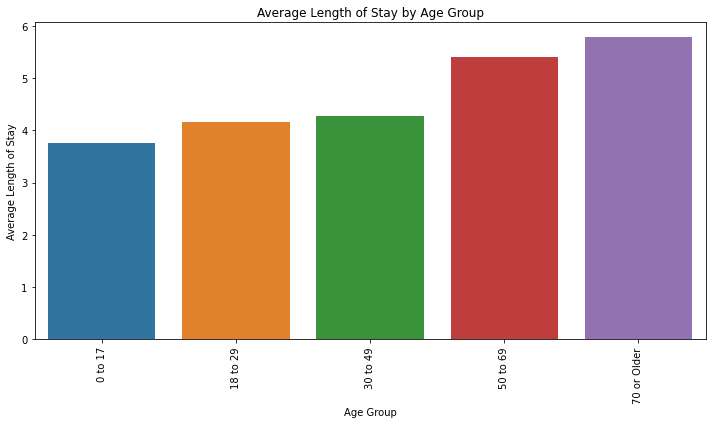

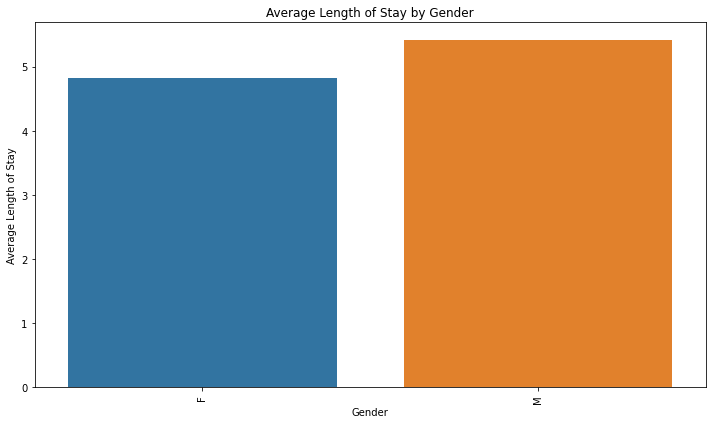

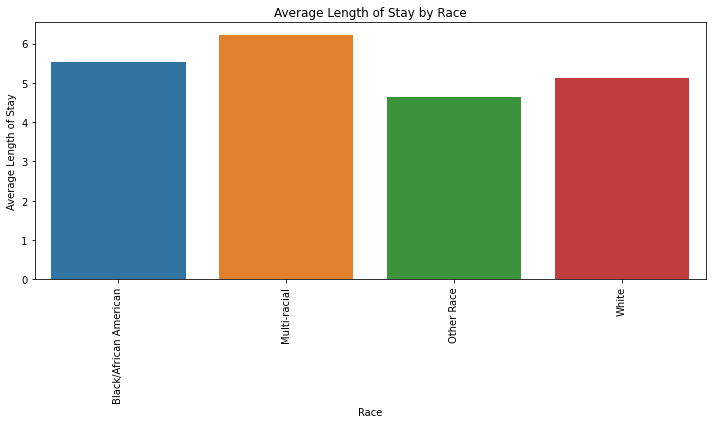

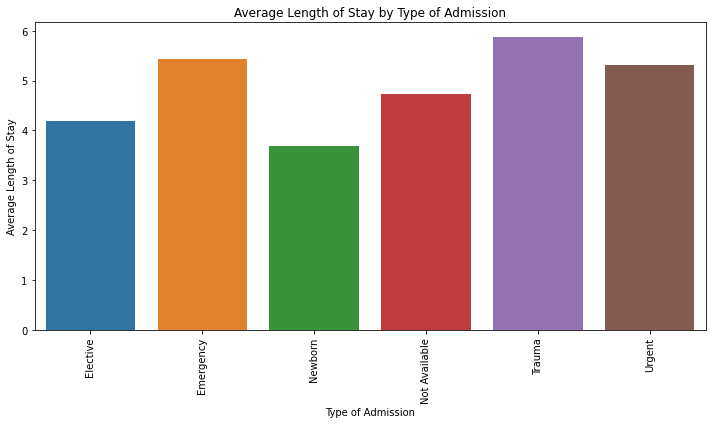

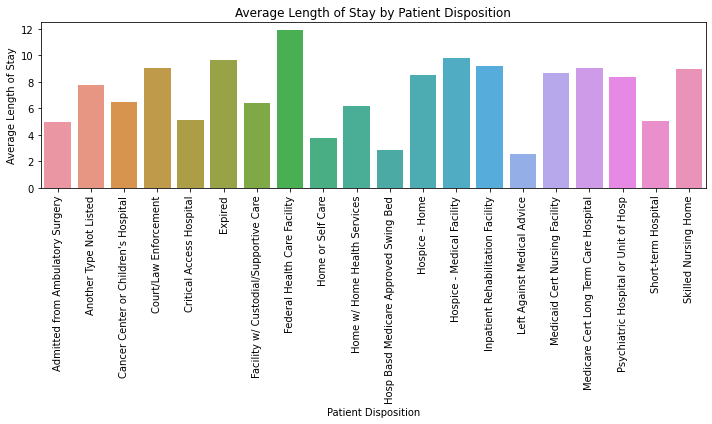

In [15]:
#visually compare the average length of stay across different segments, 
#to identify any trends or differences

# Create a folder to save the visualisations
if not os.path.exists("segment_visualisations"):
    os.makedirs("segment_visualisations")

for segment in segments:
    grouped_data = clean_data.groupby(segment)["Length of Stay"]
    
    # Calculate average length of stay for each segment
    avg_length_of_stay = grouped_data.mean()
    
    # Create a bar chart for the average length of stay
    plt.figure(figsize=(10, 6))
    sns.barplot(x=avg_length_of_stay.index, y=avg_length_of_stay.values)
    plt.title(f"Average Length of Stay by {segment}")
    plt.xlabel(segment)
    plt.ylabel("Average Length of Stay")
    plt.xticks(rotation=90)
    plt.tight_layout()
    
    # Save the visualization
    plt.savefig(f"segment_visualisations/{segment}_avg_length_of_stay.png")
    
    plt.show()

# Step 3: Insights Generation

Explore the impact of patient disposition on length of stay. Are there certain dispositions that tend to result in longer stays?

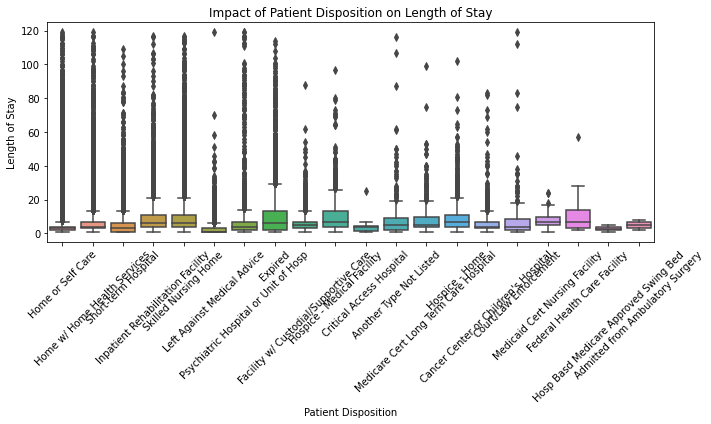

In [16]:
# Explore the impact of patient disposition on length of stay
plt.figure(figsize=(10, 6))
sns.boxplot(x="Patient Disposition", y="Length of Stay", data=clean_data)
plt.title("Impact of Patient Disposition on Length of Stay")
plt.xlabel("Patient Disposition")
plt.ylabel("Length of Stay")
plt.xticks(rotation=45)
plt.tight_layout()

# Save the visualization
plt.savefig("segment_visualisations/patient_disposition_length_of_stay.png")

plt.show()

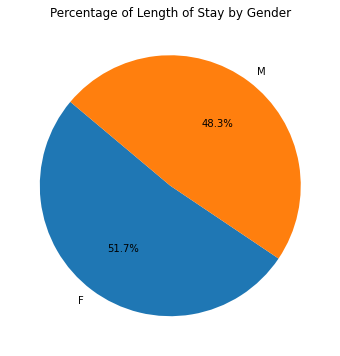

In [17]:
# Calculate the total length of stay
total_length_of_stay = clean_data["Length of Stay"].sum()

# Group data by gender and calculate total length of stay for each gender
gender_grouped = clean_data.groupby("Gender")["Length of Stay"].sum()

# Calculate the percentage of length of stay for each gender
percentage_by_gender = (gender_grouped / total_length_of_stay) * 100

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(percentage_by_gender, labels=percentage_by_gender.index, autopct="%1.1f%%", startangle=140)
plt.title("Percentage of Length of Stay by Gender")
plt.savefig(f"segment_visualisations/percentage_by_gender.png")

plt.show()

In [18]:
# Group data by patient disposition and calculate average length of stay
avg_length_by_disposition = clean_data.groupby("Patient Disposition")["Length of Stay"].mean()

# Create a DataFrame from the calculated results
avg_length_df = pd.DataFrame({
    "Patient Disposition": avg_length_by_disposition.index,
    "Average Length of Stay": avg_length_by_disposition.values
})

# Display the DataFrame
print(avg_length_df)

                      Patient Disposition  Average Length of Stay
0        Admitted from Ambulatory Surgery                5.000000
1                 Another Type Not Listed                7.732919
2    Cancer Center or Children's Hospital                6.462252
3                   Court/Law Enforcement                9.064171
4                Critical Access Hospital                5.083333
5                                 Expired                9.657590
6   Facility w/ Custodial/Supportive Care                6.424668
7            Federal Health Care Facility               11.882353
8                       Home or Self Care                3.746194
9            Home w/ Home Health Services                6.175982
10  Hosp Basd Medicare Approved Swing Bed                2.875000
11                         Hospice - Home                8.528378
12             Hospice - Medical Facility                9.804167
13      Inpatient Rehabilitation Facility                9.207783
14        

In [19]:
avg_length_df.head(20)

,Patient Disposition,Average Length of Stay
0,Admitted from Ambulatory Surgery,5.000000
1,Another Type Not Listed,7.732919
2,Cancer Center or Children's Hospital,6.462252
3,Court/Law Enforcement,9.064171
4,Critical Access Hospital,5.083333
5,Expired,9.657590
6,Facility w/ Custodial/Supportive Care,6.424668
7,Federal Health Care Facility,11.882353
8,Home or Self Care,3.746194
9,Home w/ Home Health Services,6.175982
